### data dictionary
There are 9 features and each feature can be accessed by its name.
- Area_type = describes the area.
- Availability = when it can be possessed or when it is ready(categorical and time-series)  
- Location = where it is located in Bengaluru 
- Price = Value of the property in lakhs(INR) 
- Size = in BHK or Bedroom (1-10 or more) 
- Society = to which society it belongs 
- Total_sqft = size of the property in sq.ft 
- Bath = No. of bathrooms 
- Balcony = No. of the balcony 

#### Problem statement
- build a model to predict the price of houses in Bengaluru.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings('ignore')

### Load the dataset

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [4]:
train.shape # shape of train data is 13320x9.

(13320, 9)

In [5]:
test.shape # shape of test data is 1480 x 9.

(1480, 9)

In [6]:
train.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
### Inferences:
#- size,society,bath and balcony have null values.

In [9]:
test.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1478 non-null   object 
 4   society       854 non-null    object 
 5   total_sqft    1480 non-null   object 
 6   bath          1473 non-null   float64
 7   balcony       1411 non-null   float64
 8   price         0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 104.2+ KB


In [11]:
test['price'].value_counts()

Series([], Name: price, dtype: int64)

In [12]:
## price column has no data inside it.(In test dataset since it is a target column.)

### Check and treat for null values before combining the dataset

In [13]:
train.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [14]:
for i in ['size','society','bath','balcony']:
    print(i,test[i].value_counts(),sep='\n',end='\n\n')

size
2 BHK         540
3 BHK         478
4 Bedroom      92
4 BHK          82
3 Bedroom      66
1 BHK          54
5 Bedroom      41
2 Bedroom      39
1 Bedroom      17
6 Bedroom      17
7 Bedroom      12
8 Bedroom      10
9 Bedroom       8
9 BHK           5
6 BHK           5
10 Bedroom      3
8 BHK           3
1 RK            2
5 BHK           2
7 BHK           1
16 Bedroom      1
Name: size, dtype: int64

society
GrrvaGr    12
Bhmesy     12
Soitya      9
Prarkun     8
DLhtsnd     7
           ..
V2anags     1
Cehosy      1
Kuownri     1
SSaleRo     1
MaicaRS     1
Name: society, Length: 594, dtype: int64

bath
2.0     744
3.0     371
4.0     149
1.0      83
5.0      62
6.0      30
7.0      11
9.0       9
8.0       9
10.0      4
16.0      1
Name: bath, dtype: int64

balcony
1.0    547
2.0    545
3.0    189
0.0    130
Name: balcony, dtype: int64



In [15]:
train['society'].fillna('0',inplace=True)

In [16]:
for i in ['size','bath','balcony','location']:
    train[i].fillna(train[i].mode()[0],inplace=True)

In [17]:
train.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [18]:
test.isnull().sum()

area_type          0
availability       0
location           0
size               2
society          626
total_sqft         0
bath               7
balcony           69
price           1480
dtype: int64

In [19]:
test['society'].fillna('0',inplace=True)

In [20]:
for i in ['size','bath','balcony']:
    test[i].fillna(test[i].mode()[0],inplace=True)

In [21]:
test.isnull().sum()

area_type          0
availability       0
location           0
size               0
society            0
total_sqft         0
bath               0
balcony            0
price           1480
dtype: int64

### Combine the dataset

In [22]:
data = pd.concat([train,test])

In [23]:
data.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


In [24]:
data.shape

(14800, 9)

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,14800.0,2.694932,1.341274,1.0,2.0,2.0,3.0,40.0
balcony,14800.0,1.596622,0.805491,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [26]:
data.describe(include='object').T

,count,unique,top,freq
area_type,14800,4,Super built-up Area,9736
availability,14800,82,Ready To Move,11743
location,14800,1358,Whitefield,592
size,14800,32,2 BHK,5757
society,14800,2833,0,6128
total_sqft,14800,2221,1200,940


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14800 entries, 0 to 1479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     14800 non-null  object 
 1   availability  14800 non-null  object 
 2   location      14800 non-null  object 
 3   size          14800 non-null  object 
 4   society       14800 non-null  object 
 5   total_sqft    14800 non-null  object 
 6   bath          14800 non-null  float64
 7   balcony       14800 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.1+ MB


In [28]:
data['total_sqft'].value_counts()

1200           940
1100           240
1500           238
2400           224
600            200
              ... 
1113.12          1
1782 - 2000      1
621              1
981              1
6750             1
Name: total_sqft, Length: 2221, dtype: int64

In [29]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [30]:
cat_cols=['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony']

### Univariate Analysis

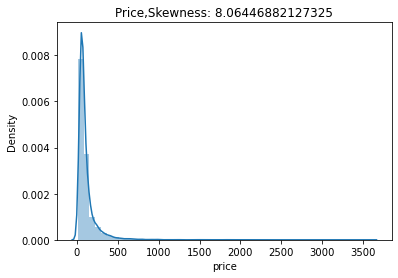

In [31]:
# PRICE
sns.distplot(data['price'])
plt.title(f"Price,Skewness: {data['price'].skew()}")
plt.show()

In [32]:
## price is highly positive skewed.

In [33]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

#### Area type

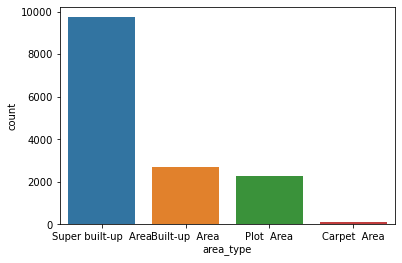

In [34]:
## area_type
sns.countplot(x=data['area_type'],order=data['area_type'].value_counts().index)
plt.show()

In [35]:
# Super built-up is the area with most of the houses.

#### Bathroom

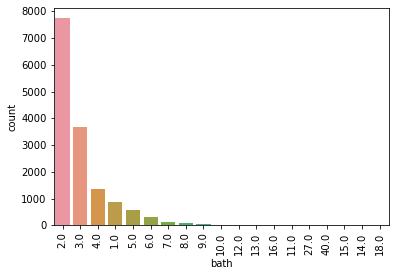

In [36]:
sns.countplot(x=data['bath'],order=data['bath'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [37]:
# Most of the houses have 2 bathrooms.

#### Balcony

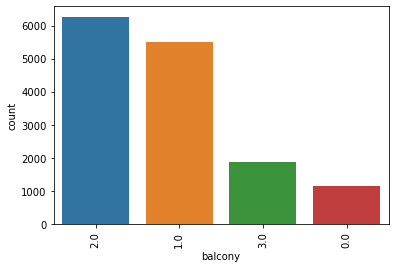

In [38]:
sns.countplot(x=data['balcony'],order=data['balcony'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [39]:
# Most of the houses have 2 balconies and liitle less houses have 1 balcony.

#### Location

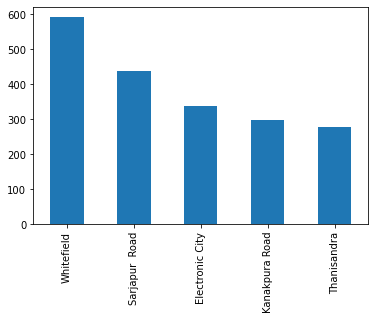

In [40]:
data['location'].value_counts().head().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [41]:
# These are the top 5 locations with most of the houses for sales.

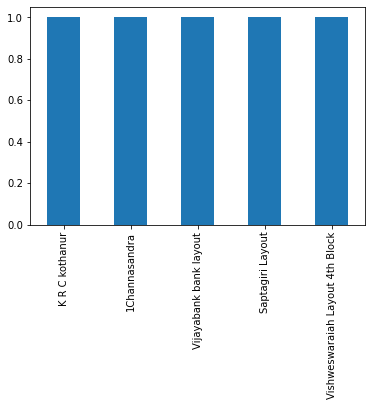

In [42]:
data['location'].value_counts().tail().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [43]:
# These are the 5 locations with least houses.

In [44]:
data['location'].nunique()

1358

In [45]:
# Total unique house locations that are present in the data.

#### Size

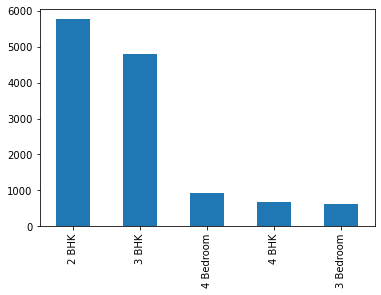

In [46]:
## size
data['size'].value_counts().head().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [47]:
# These are the top 5 house types that are on sale.
# Mostly 2bhk's are on sale.

#### Society

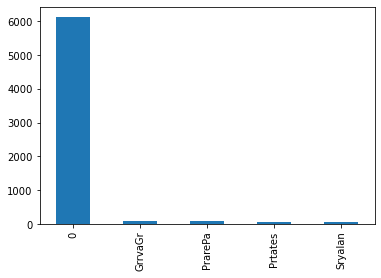

In [48]:
## society
data['society'].value_counts().head().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [49]:
# Top 5 socities with most number of the houses.

In [50]:
data.nunique()

area_type          4
availability      82
location        1358
size              32
society         2833
total_sqft      2221
bath              19
balcony            4
price           1994
dtype: int64

### Bivariate Analysis

<AxesSubplot:>

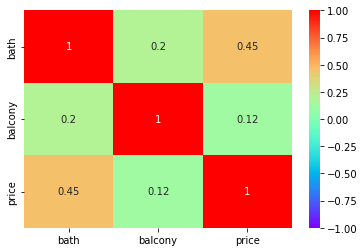

In [51]:
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True,cmap='rainbow')

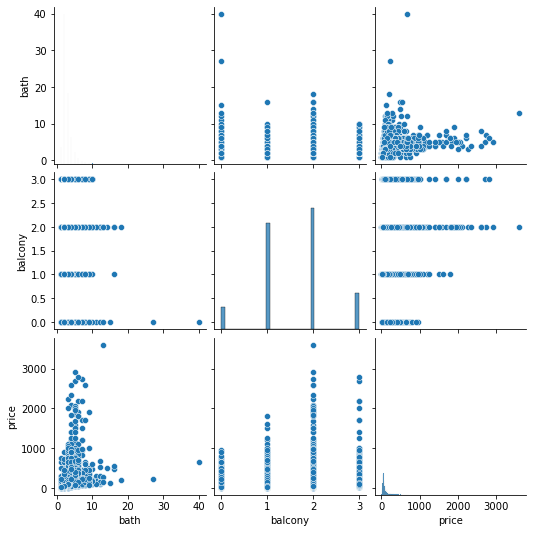

In [52]:
sns.pairplot(data)

<AxesSubplot:xlabel='area_type', ylabel='price'>

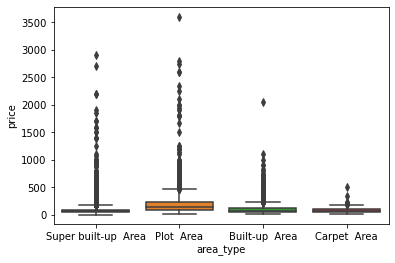

In [53]:
sns.boxplot(x=train['area_type'],y=train['price'])

#### Let's test the normality of the data

In [54]:
from scipy.stats import shapiro,jarque_bera,kruskal

In [55]:
# Asssumption 1 : The 

# H0 : The data is normal
# Ha : The data is not normal
shapiro(train['price'])

ShapiroResult(statistic=0.4532784089290045, pvalue=1.6561210545989478e-107)

In [56]:
# Asssumption 1 : The 

# H0 : The data is normal
# Ha : The data is not normal
jarque_bera(train['price'])

SignificanceResult(statistic=6632915.949139312, pvalue=0.0)

#### The data is not normal

#### Significance of area_type 

In [57]:
# We have to go with non-parametric test Krushal walls
# H0 : area_type has no effect on price
# Ha : area_type has effect on price
li=[]
for i in train['area_type'].unique():
    s = train[train['area_type']==i]['price']
    li.append(s)
print(kruskal(li[0],li[1],li[2],li[3]))

KruskalResult(statistic=1491.5655775623948, pvalue=0.0)


#### Significance of balcony

#### House price is affected by area_type 

In [58]:
# We have to go with non-parametric test Krushal walls
# H0 : balcony has no effect on price
# Ha : balcony has effect on price
li=[]
for i in train['balcony'].unique():
    s = train[train['balcony']==i]['price']
    li.append(s)
print(kruskal(li[0],li[1],li[2],li[3]))

KruskalResult(statistic=909.2029893954316, pvalue=8.929492077104591e-197)


#### House price is affected by balcony

In [59]:
# List of categorical columns to test (excluding 'price')
categorical_columns = ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft', 'bath', 'balcony']

for col in categorical_columns:
    groups = [train['price'][train[col] == category] for category in train[col].unique()]
    
    # Perform Kruskal-Wallis test
    h, p_value = kruskal(*groups)
    
    print(f'Kruskal-Wallis test for {col}:')
    print(f'   H-statistic: {h}')
    print(f'   P-value: {p_value}')
    print()


Kruskal-Wallis test for area_type:
   H-statistic: 1491.5655775623948
   P-value: 0.0

Kruskal-Wallis test for availability:
   H-statistic: 411.41445085740014
   P-value: 4.5743483446249535e-46

Kruskal-Wallis test for location:
   H-statistic: 5594.129283632322
   P-value: 0.0

Kruskal-Wallis test for size:
   H-statistic: 6680.931337003881
   P-value: 0.0

Kruskal-Wallis test for society:
   H-statistic: 6426.808268992063
   P-value: 6.514657766374069e-306

Kruskal-Wallis test for total_sqft:
   H-statistic: 9035.246070615141
   P-value: 0.0

Kruskal-Wallis test for bath:
   H-statistic: 6793.719687274006
   P-value: 0.0

Kruskal-Wallis test for balcony:
   H-statistic: 909.2029893954316
   P-value: 8.929492077104591e-197



#### Thus we can say all of the columns is significant.

### Data preprocessig

In [60]:
data.isnull().sum()

area_type          0
availability       0
location           0
size               0
society            0
total_sqft         0
bath               0
balcony            0
price           1480
dtype: int64

In [61]:
# There are no null values in the data.
# Null value in price is due to the merger of train and test data.

#### Outlier treatment

<AxesSubplot:xlabel='price'>

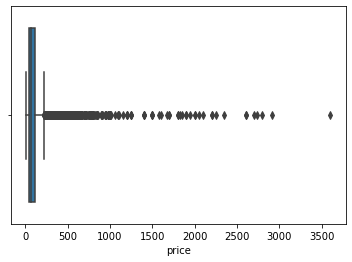

In [62]:
# Treat the outliers
sns.boxplot(x=data['price'])

### Feature Engineering

In [63]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,0,1200,2.0,1.0,51.00


In [64]:
data.nunique()

area_type          4
availability      82
location        1358
size              32
society         2833
total_sqft      2221
bath              19
balcony            4
price           1994
dtype: int64

In [65]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

#### Encoding area_type

In [66]:
data['area_type'].value_counts()

Super built-up  Area    9736
Built-up  Area          2688
Plot  Area              2279
Carpet  Area              97
Name: area_type, dtype: int64

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
le=LabelEncoder()

In [69]:
data['area_type'] = le.fit_transform(data['area_type'])

In [70]:
data['area_type'].value_counts()

3    9736
0    2688
2    2279
1      97
Name: area_type, dtype: int64

- 3=super builtup area
- 0=built up area
- 2=plot area
- 1=carpet area

#### Encoding availability

In [71]:
data['availability'].value_counts()

Ready To Move    11743
18-Dec             351
18-May             324
18-Apr             296
18-Aug             225
                 ...  
15-Aug               1
16-Nov               1
16-Jan               1
14-Jul               1
16-Apr               1
Name: availability, Length: 82, dtype: int64

In [72]:
data['availability']=np.where(data['availability']=='Ready To Move','0-0',data['availability'])

In [73]:
data[['date','month']] = data['availability'].str.split('-',expand=True)

In [74]:
data.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,date,month
0,3,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,19,Dec
1,2,0-0,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,0


In [75]:
data.drop(columns='availability',inplace=True)

In [76]:
data['month'].value_counts()

0      11743
Dec      831
May      374
Apr      325
Aug      277
Mar      270
Jul      229
Jun      217
Jan      143
Oct      101
Sep       94
Nov       93
Feb       85
Name: month, dtype: int64

In [77]:
from sklearn.preprocessing import OrdinalEncoder

In [78]:
oe = OrdinalEncoder(categories=[['0','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])

In [79]:
data['month'].isnull().sum()

18

In [80]:
data['month'] = np.where(data['month'].isnull(),data['month'].mode(),data['month'])

In [81]:
data['month'] = oe.fit_transform(data[['month']])

In [82]:
data.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,date,month
0,3,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,19,12.0
1,2,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,0.0
2,0,Uttarahalli,3 BHK,0,1440,2.0,3.0,62.00,0,0.0
3,3,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0.0
4,3,Kothanur,2 BHK,0,1200,2.0,1.0,51.00,0,0.0


#### Encoding location

In [83]:
data['location'] =le.fit_transform(data['location'])

In [84]:
data.head(2)

,area_type,location,size,society,total_sqft,bath,balcony,price,date,month
0,3,430,2 BHK,Coomee,1056,2.0,1.0,39.07,19,12.0
1,2,325,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,0.0


#### Encoding size

In [85]:
data['size'].value_counts()

2 BHK         5757
3 BHK         4788
4 Bedroom      918
4 BHK          673
3 Bedroom      613
1 BHK          592
2 Bedroom      368
5 Bedroom      338
6 Bedroom      208
1 Bedroom      122
7 Bedroom       95
8 Bedroom       94
5 BHK           61
9 Bedroom       54
6 BHK           35
7 BHK           18
1 RK            15
10 Bedroom      15
9 BHK           13
8 BHK            8
10 BHK           2
11 BHK           2
11 Bedroom       2
19 BHK           1
16 BHK           1
43 Bedroom       1
14 BHK           1
27 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
16 Bedroom       1
Name: size, dtype: int64

In [86]:
data['size'] = np.where(data['size']=='1 RK','0 bhk',data['size'])

In [87]:
data[['size','bhk']] = data['size'].str.split(' ',expand=True)

In [88]:
data.head(2)

,area_type,location,size,society,total_sqft,bath,balcony,price,date,month,bhk
0,3,430,2,Coomee,1056,2.0,1.0,39.07,19,12.0,BHK
1,2,325,4,Theanmp,2600,5.0,3.0,120.00,0,0.0,Bedroom


In [89]:
data.drop(columns='bhk',inplace=True)

In [90]:
data.head(2)

,area_type,location,size,society,total_sqft,bath,balcony,price,date,month
0,3,430,2,Coomee,1056,2.0,1.0,39.07,19,12.0
1,2,325,4,Theanmp,2600,5.0,3.0,120.00,0,0.0


#### Encoding Society

In [91]:
np.cumsum(data['society'].value_counts(normalize=True))


0          0.414054
GrrvaGr    0.420270
PrarePa    0.425541
Prtates    0.429865
Sryalan    0.434122
             ...   
Goezell    0.999730
Hanar I    0.999797
Prclee     0.999865
Alows M    0.999932
MaicaRS    1.000000
Name: society, Length: 2833, dtype: float64

In [92]:
data['society'] = le.fit_transform(data['society'])

In [93]:
data.head(2)

,area_type,location,size,society,total_sqft,bath,balcony,price,date,month
0,3,430,2,488,1056,2.0,1.0,39.07,19,12.0
1,2,325,4,2569,2600,5.0,3.0,120.00,0,0.0


####  total_sqft

In [94]:
data['total_sqft'] = data['total_sqft'].apply(lambda x: (float(x.split('-')[0]) + float(x.split('-')[1])) / 2
if '-' in x else x)

In [95]:
data.shape

(14800, 10)

In [96]:
test[test['total_sqft'].str.contains('[a-z]')==True]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
325,Built-up Area,18-Apr,Doddaballapur,1 Bedroom,0,5Acres,1.0,0.0,NaN
874,Built-up Area,Ready To Move,Bisuvanahalli,3 BHK,Prityel,100Sq. Meter,3.0,1.0,NaN


In [97]:
data['total_sqft']=np.where(data['total_sqft']=='5Acres',217800,data['total_sqft'])

In [98]:
data['total_sqft']=np.where(data['total_sqft']=='100Sq. Meter',1076.391,data['total_sqft'])

In [99]:
x=data[(data['total_sqft'].str.contains('[a-z]')==True)]['total_sqft'].index

In [100]:
data.reset_index(drop=True,inplace=True)

In [101]:
sqx = [i for i in x ]

In [102]:
data.drop(index=sqx,inplace=True,axis=0)

In [103]:
data['price'].isnull().sum()

1480

In [104]:
data.shape

(14754, 10)

In [105]:
# Let's convert datatype of size from object to integer
data['size']=data['size'].astype('int') 

In [106]:
# Let's convert datatype of size from object to integer
data['total_sqft']=data['total_sqft'].astype('float') 

In [107]:
data['date']=np.where(data['date']=='Immediate Possession',0,data['date'])

In [108]:
# Let's convert datatype of size from object to integer
data['date']=data['date'].astype('int') 

In [109]:
from sklearn.preprocessing import RobustScaler

In [110]:
rs = RobustScaler()

### MODEL BUILDING

In [111]:
# IMPORT LIBRARIES
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sma
from sklearn.metrics import mean_squared_error,r2_score

In [112]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import  VotingRegressor,StackingRegressor

from sklearn.metrics import r2_score,mean_absolute_percentage_error,mean_squared_error

In [113]:
# Split dataset into train and test
data_train = data[data['price'].isnull()==False]
data_test =  data[data['price'].isnull()==True]

In [114]:
data_test.shape

(1480, 10)

In [115]:
test_x=data_test.drop(columns=['price'])
test_y=data_test['price']

In [116]:
test_x = pd.DataFrame(rs.fit_transform(test_x),columns=test_x.columns)

In [117]:
x=data_train.drop(columns=['price'])
y=data_train['price']

In [118]:
x = pd.DataFrame(rs.fit_transform(x),columns=x.columns)

In [119]:
x.shape

(13274, 9)

In [120]:
y.shape

(13274,)

#### Split dataset into train test and split

In [121]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13274 entries, 0 to 13273
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13274 non-null  float64
 1   location    13274 non-null  float64
 2   size        13274 non-null  float64
 3   society     13274 non-null  float64
 4   total_sqft  13274 non-null  float64
 5   bath        13274 non-null  float64
 6   balcony     13274 non-null  float64
 7   date        13274 non-null  float64
 8   month       13274 non-null  float64
dtypes: float64(9)
memory usage: 933.5 KB


In [122]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=42)

In [123]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(9291, 9) (9291,) (3983, 9) (3983,)


In [124]:
def hack_eval(y_true,y_pred):
    scor = 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())
    return scor

In [125]:
r2 = []
ms_error = []
rms_error = []
map_error = []
fit_model = []
hack_score = []

def model_evaluation(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    pred = m.predict(xtest)
    
    print('R2',r2_score(ytest,pred))
    print('MSE',mean_squared_error(ytest,pred))
    print('RMSE',np.sqrt(mean_squared_error(ytest,pred)))
    print('MAPE',mean_absolute_percentage_error(ytest,pred))
    print('Hack Score' , hack_eval(ytest,pred))
    
    inp = input('Do you want to save the model?')
    
    if inp.lower()=='y':
        fit_model.append(str(m))
        r2.append(r2_score(ytest,pred))
        ms_error.append(mean_squared_error(ytest,pred))
        rms_error.append(np.sqrt(mean_squared_error(ytest,pred)))
        map_error.append(mean_absolute_percentage_error(ytest,pred))
        hack_score.append(hack_eval(ytest,pred))
        
        global score_card 
        score_card = pd.DataFrame({'Model':fit_model,
                                  'R2':r2,
                                  'MSE':ms_error,
                                  'RMSE':rms_error,
                                  'MAPE':map_error,
                                  'Hackathon score':hack_score})

#### LInear regtession model

In [126]:
lr = LinearRegression()

In [127]:
model = lr.fit(x_train,y_train)

In [128]:
y_pred = model.predict(x_test)

In [129]:
mean_squared_error(y_test,y_pred)

15823.391131670998

In [130]:
r2_score(y_test,y_pred)

0.4304060701426977

#### Decision tree

In [131]:
dt = DecisionTreeRegressor(max_depth=5,random_state=42,max_features=7)

In [132]:
model = dt.fit(x_train,y_train)

In [133]:
y_pred = model.predict(x_test)

In [134]:
mean_squared_error(y_test,y_pred)

12434.796218501686

In [135]:
r2_score(y_test,y_pred)

0.5523851754574474

#### Testing all the models

In [136]:
model_evaluation(LinearRegression(),x_train,y_train,x_test,y_test)

R2 0.4304060701426977
MSE 15823.391131670998
RMSE 125.79106141404085
MAPE 0.43057551149166456
Hack Score 0.7925419332367071
Do you want to save the model?y


In [137]:
model_evaluation(DecisionTreeRegressor(max_depth=7,random_state=42),x_train,y_train,x_test,y_test)

R2 0.5266619073512397
MSE 13149.39184723553
RMSE 114.67079770907469
MAPE 0.31853403136811315
Hack Score 0.8330658955459485
Do you want to save the model?y


In [138]:
model_evaluation(RandomForestRegressor(max_depth=18,),x_train,y_train,x_test,y_test)

R2 0.5775409382526333
MSE 11735.965958805124
RMSE 108.33266339754194
MAPE 0.275245467666109
Hack Score 0.8516416096576601
Do you want to save the model?y


In [139]:
model_evaluation(AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=18),n_estimators=10),x_train,y_train,x_test,y_test)

R2 0.5509288818182547
MSE 12475.25223926947
RMSE 111.69266869078503
MAPE 0.2810306663201181
Hack Score 0.8506535125116204
Do you want to save the model?y


In [140]:
model_evaluation(GradientBoostingRegressor(max_features=7,max_depth=6,n_estimators=700),x_train,y_train,x_test,y_test)

R2 0.58771437466308
MSE 11453.346613623531
RMSE 107.02030935118592
MAPE 0.2531326562544644
Hack Score 0.8605545407265933
Do you want to save the model?y


In [141]:
model_evaluation(XGBRegressor(n_estimators=130,max_depth=8),x_train,y_train,x_test,y_test)

R2 0.5637020425504478
MSE 12120.412224903748
RMSE 110.09274374319021
MAPE 0.25561258855581975
Hack Score 0.8572451158609701
Do you want to save the model?y


In [142]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon score
0,LinearRegression(),0.430406,15823.391132,125.791061,0.430576,0.792542
1,"DecisionTreeRegressor(max_depth=7, random_stat...",0.526662,13149.391847,114.670798,0.318534,0.833066
2,RandomForestRegressor(max_depth=18),0.577541,11735.965959,108.332663,0.275245,0.851642
3,AdaBoostRegressor(base_estimator=RandomForestR...,0.550929,12475.252239,111.692669,0.281031,0.850654
4,"GradientBoostingRegressor(max_depth=6, max_fea...",0.587714,11453.346614,107.020309,0.253133,0.860555
5,"XGBRegressor(base_score=None, booster=None, ca...",0.563702,12120.412225,110.092744,0.255613,0.857245


In [143]:
base_models = [('Dt',DecisionTreeRegressor(max_depth=10)),
              ('RF',RandomForestRegressor(max_depth=18)),
              ('GBR',GradientBoostingRegressor(max_depth=7,n_estimators=150)),
              ('XGBR',XGBRegressor(max_depth=8,n_estimators=130))]

In [144]:
model_evaluation(VotingRegressor(base_models),x_train,y_train,x_test,y_test)

R2 0.5919170199432149
MSE 11336.596598271532
RMSE 106.47345489966752
MAPE 0.2651847977161137
Hack Score 0.8580261444189424
Do you want to save the model?y


In [145]:
base_models = [('Dt',DecisionTreeRegressor(max_depth=10)),
               ('DT2',DecisionTreeRegressor(max_depth=7)),
               ('RF2',RandomForestRegressor(max_depth=8)),
              ('RF',RandomForestRegressor(max_depth=18)),
              ('GBR',GradientBoostingRegressor(max_depth=7,n_estimators=150)),
              ('XGBR',XGBRegressor(max_depth=8,n_estimators=130))]

In [146]:
model_evaluation(StackingRegressor(estimators=base_models),x_train,y_train,x_test,y_test)

R2 0.566325675127822
MSE 12047.527381366202
RMSE 109.76122895342509
MAPE 0.28550437686465846
Hack Score 0.8534267577200891
Do you want to save the model?y


In [147]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon score
0,LinearRegression(),0.430406,15823.391132,125.791061,0.430576,0.792542
1,"DecisionTreeRegressor(max_depth=7, random_stat...",0.526662,13149.391847,114.670798,0.318534,0.833066
2,RandomForestRegressor(max_depth=18),0.577541,11735.965959,108.332663,0.275245,0.851642
3,AdaBoostRegressor(base_estimator=RandomForestR...,0.550929,12475.252239,111.692669,0.281031,0.850654
4,"GradientBoostingRegressor(max_depth=6, max_fea...",0.587714,11453.346614,107.020309,0.253133,0.860555
5,"XGBRegressor(base_score=None, booster=None, ca...",0.563702,12120.412225,110.092744,0.255613,0.857245
6,"VotingRegressor(estimators=[('Dt', DecisionTre...",0.591917,11336.596598,106.473455,0.265185,0.858026
7,"StackingRegressor(estimators=[('Dt', DecisionT...",0.566326,12047.527381,109.761229,0.285504,0.853427


#### Let's tune xgbregressor

In [148]:
param = {'n_estimators':[100,130,150,170,180,200],
        'max_depth':[8,9,10,11,12],
        'gamma':[0,1,2]}

In [149]:
from sklearn.model_selection import GridSearchCV

In [150]:
gscv = GridSearchCV(estimator=XGBRegressor(),
                   param_grid=param,
                   scoring='r2',
                   verbose=3,
                   cv=5)

In [151]:
#gscv.fit(x_train,y_train)

In [152]:
#gscv.best_params_

#### Let's tune Gradient boosting regressor

In [153]:
model_evaluation(GradientBoostingRegressor(loss='huber',max_features=3,max_depth=6,n_estimators=700),x_train,y_train,x_test,y_test)

R2 0.6101051782714559
MSE 10831.327268479661
RMSE 104.07366270329713
MAPE 0.23196020737394854
Hack Score 0.8675964898534656
Do you want to save the model?y


In [154]:
param = {'n_estimators':[450,500,550,600,650,700,750],
        'max_depth':[4,5,6,7,8],
        'max_features':[4,5,6,7],
        ''}

SyntaxError: invalid syntax (2013729439.py, line 4)

In [156]:
model_evaluation(XGBRegressor(n_estimators=100,max_depth=8,gamma=2),x_train,y_train,x_test,y_test)

R2 0.5638796291503334
MSE 12115.478846785694
RMSE 110.07033590748097
MAPE 0.25768641825934363
Hack Score 0.8565681778580019
Do you want to save the model?


In [157]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon score
0,LinearRegression(),0.430406,15823.391132,125.791061,0.430576,0.792542
1,"DecisionTreeRegressor(max_depth=7, random_stat...",0.526662,13149.391847,114.670798,0.318534,0.833066
2,RandomForestRegressor(max_depth=18),0.577541,11735.965959,108.332663,0.275245,0.851642
3,AdaBoostRegressor(base_estimator=RandomForestR...,0.550929,12475.252239,111.692669,0.281031,0.850654
4,"GradientBoostingRegressor(max_depth=6, max_fea...",0.587714,11453.346614,107.020309,0.253133,0.860555
5,"XGBRegressor(base_score=None, booster=None, ca...",0.563702,12120.412225,110.092744,0.255613,0.857245
6,"VotingRegressor(estimators=[('Dt', DecisionTre...",0.591917,11336.596598,106.473455,0.265185,0.858026
7,"StackingRegressor(estimators=[('Dt', DecisionT...",0.566326,12047.527381,109.761229,0.285504,0.853427
8,"GradientBoostingRegressor(loss='huber', max_de...",0.610105,10831.327268,104.073663,0.231960,0.867596
9,"XGBRegressor(base_score=None, booster=None, ca...",0.563880,12115.478847,110.070336,0.257686,0.856568


In [158]:
xgb = XGBRegressor(n_estimators=130,max_depth=8)

In [159]:
model = xgb.fit(x_train,y_train)

In [160]:
y_pred = model.predict(x_test)

In [161]:
r2_score(y_test,y_pred)

0.5637020425504478

In [162]:
score_card

,Model,R2,MSE,RMSE,MAPE,Hackathon score
0,LinearRegression(),0.430406,15823.391132,125.791061,0.430576,0.792542
1,"DecisionTreeRegressor(max_depth=7, random_stat...",0.526662,13149.391847,114.670798,0.318534,0.833066
2,RandomForestRegressor(max_depth=18),0.577541,11735.965959,108.332663,0.275245,0.851642
3,AdaBoostRegressor(base_estimator=RandomForestR...,0.550929,12475.252239,111.692669,0.281031,0.850654
4,"GradientBoostingRegressor(max_depth=6, max_fea...",0.587714,11453.346614,107.020309,0.253133,0.860555
5,"XGBRegressor(base_score=None, booster=None, ca...",0.563702,12120.412225,110.092744,0.255613,0.857245
6,"VotingRegressor(estimators=[('Dt', DecisionTre...",0.591917,11336.596598,106.473455,0.265185,0.858026
7,"StackingRegressor(estimators=[('Dt', DecisionT...",0.566326,12047.527381,109.761229,0.285504,0.853427
8,"GradientBoostingRegressor(loss='huber', max_de...",0.610105,10831.327268,104.073663,0.231960,0.867596
9,"XGBRegressor(base_score=None, booster=None, ca...",0.563880,12115.478847,110.070336,0.257686,0.856568


## LEt's make another final model


In [163]:
model_evaluation(GradientBoostingRegressor(loss='huber',max_features=3,max_depth=6,n_estimators=700),x_train,y_train,x_test,y_test)

R2 0.6070312137883298
MSE 10916.722389094017
RMSE 104.48312011561492
MAPE 0.23156953584461268
Hack Score 0.8673628845730835
Do you want to save the model?y


In [176]:
gbr = GradientBoostingRegressor(loss='huber',max_features=3,max_depth=6,n_estimators=700)

In [177]:
model = gbr.fit(x_train,y_train)

In [178]:
y_pred = model.predict(x_test)

In [179]:
r2_score(y_test,y_pred)

0.6051226788597521

In [180]:
1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean())

0.8683341660143037

#### Let's preprocess the test data too before predicting

In [181]:
test_x

,area_type,location,size,society,total_sqft,bath,balcony,date,month
0,0.0,-0.601286,-1.0,0.894484,-0.126178,0.0,1.0,0.0,0.0
1,-1.0,-0.892283,6.0,-0.230216,1.799263,7.0,1.0,0.0,0.0
2,-1.0,-0.199357,1.0,0.986811,0.570258,3.0,1.0,18.0,4.0
3,0.0,0.101286,0.0,1.458633,0.032773,1.0,0.0,0.0,0.0
4,0.0,0.110932,-1.0,-0.148681,-0.231053,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1475,0.0,1.006431,-1.0,0.774580,-0.091766,0.0,0.0,0.0,0.0
1476,0.0,-0.290997,0.0,-0.230216,0.586645,1.0,1.0,0.0,0.0
1477,0.0,-0.553055,-1.0,1.344724,-0.140926,0.0,1.0,0.0,0.0
1478,-3.0,0.884244,-1.0,1.011990,-0.501434,0.0,0.0,18.0,2.0


In [182]:
final_pred = model.predict(test_x)

In [183]:
final_pred

array([ 63.6615477 , 315.60419745, 191.44176949, ...,  68.86743589,
        43.31199822,  46.08293714])

In [184]:
len(final_pred)

1480

In [185]:
final_submission01 = pd.DataFrame({'price':final_pred})

In [187]:
final_submission01.to_csv('final_submissionprice02.csv',index=False)

In [189]:
final_submission01

,price
0,63.661548
1,315.604197
2,191.441769
3,92.961912
4,54.207567
...,...
1475,73.707116
1476,97.441933
1477,68.867436
1478,43.311998


In [190]:

final_model = gbr.fit(x,y)

In [191]:
final_pred = final_model.predict(test_x)

In [192]:
final_pred

array([ 61.18100856, 368.96078758, 218.71320878, ...,  55.16699867,
        49.98116718,  48.69621   ])

In [193]:
final_submission03 = pd.DataFrame({'price':final_pred})

In [194]:
final_submission03.to_csv('final_submissionprice03.csv',index=False)

In [ ]:
y